In [26]:
import h5py
from pathlib import Path
import seaborn as sns
from whirligig import beamforming, data
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import optimize
home = Path.home()


def synca_phase_model1(radial_position, roll=0, n=60):
    #radial position in mm
    wavelength = 3e8 / 25.86e9
    r_array = 0.1
    theta_array = np.arange(0, n, 1) * 2 * np.pi / n
    x_array = r_array * np.cos(theta_array)
    y_array = r_array * np.sin(theta_array)

    d = np.sqrt((x_array - radial_position*0.001) ** 2 + y_array ** 2)
    arctan = np.arctan2(y_array, radial_position*0.001-x_array)
    #arctan = np.arange(0, 120, 1)*2*np.pi/120
    #print(arctan)
    spatial = 2*np.pi * d/wavelength
    phase = np.unwrap(np.roll(spatial+arctan, roll))
    phase -= phase[0]
    
    return phase

def TestPhaseModel(coordinates, roll=-14):
    #radial position in mm
    wavelengths = 3e8 / np.linspace(25.1e9,26.5e9,141)
    r_array = 0.1
    ant_angles = np.arange(0, 360, 6)
    x_array = r_array * np.cos(np.radians(ant_angles))
    y_array = r_array * np.sin(np.radians(ant_angles))
    x_coord, y_coord = coordinates[:, 0], coordinates[:, 1]

    d = np.sqrt(
        (x_array[:, np.newaxis] - x_coord[np.newaxis, :]) ** 2
        + (y_array[:, np.newaxis] - y_coord[np.newaxis, :]) ** 2
        )
    arctan = np.arctan2(
        y_array[:, np.newaxis] - y_coord[np.newaxis, :],
        x_array[:, np.newaxis] - x_coord[np.newaxis, :]
        )

    spatial = 2*np.pi * d[:, :, np.newaxis] / wavelengths[np.newaxis, np.newaxis, :]
    phase = np.unwrap(np.roll(spatial-arctan[:, :, np.newaxis], roll, axis=0), axis=0)
    phase -= phase[0, :, :][np.newaxis, :, :]
    
    return -phase

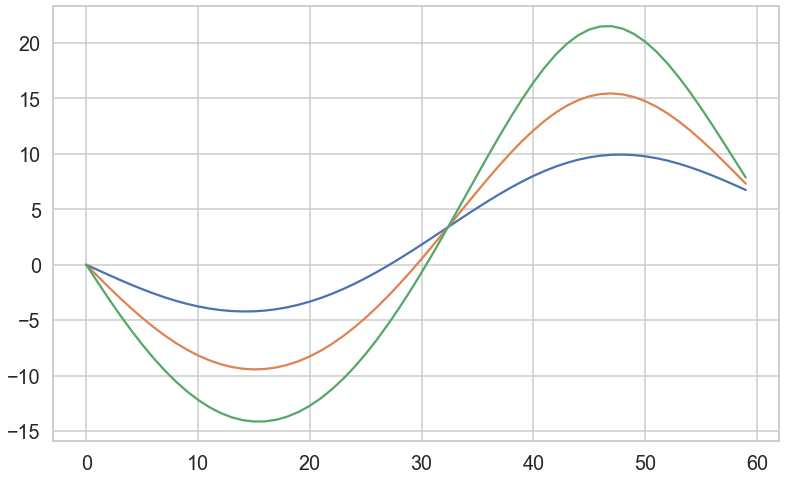

In [27]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(1,1,1)

for r in [10,20,30]:
    ax.plot(-synca_phase_model1(r, roll=-14))

In [30]:
x_coord = np.array([0.01,0.02,0.03])
y_coord = np.array([0])

xx, yy = np.meshgrid(x_coord, y_coord)
coordinates = np.array([xx.flatten(), yy.flatten()]).T
test_phases = TestPhaseModel(coordinates,)
print(test_phases.shape)

(60, 3, 141)


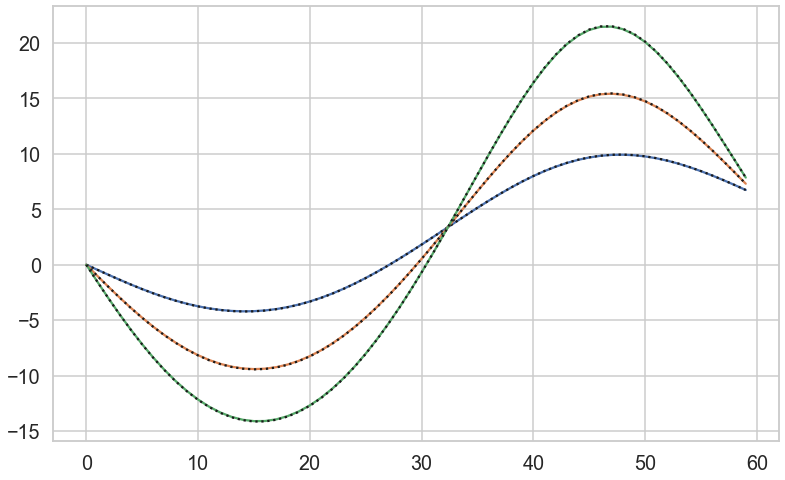

In [32]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(1,1,1)
radii = [10,20,30]
for i in range(3):
    ax.plot(test_phases[:, i, 70])
    ax.plot(-synca_phase_model1(radii[i],roll=-14), color='k', ls=':')